In [14]:
import pandas as pd

In [15]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [18]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [19]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [20]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True


In [21]:
# Handling missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Drop irrelevant columns that won't contribute to the prediction
titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

C:\Users\kirst\AppData\Local\Temp\ipykernel_20676\355205865.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


In [22]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
# Features and target variable
X = titanic_df.drop("Survived", axis=1)
y = titanic_df["Survived"]

# Split the dataset into training, development, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, 
                                                test_size=0.5, 
                                                random_state=42)

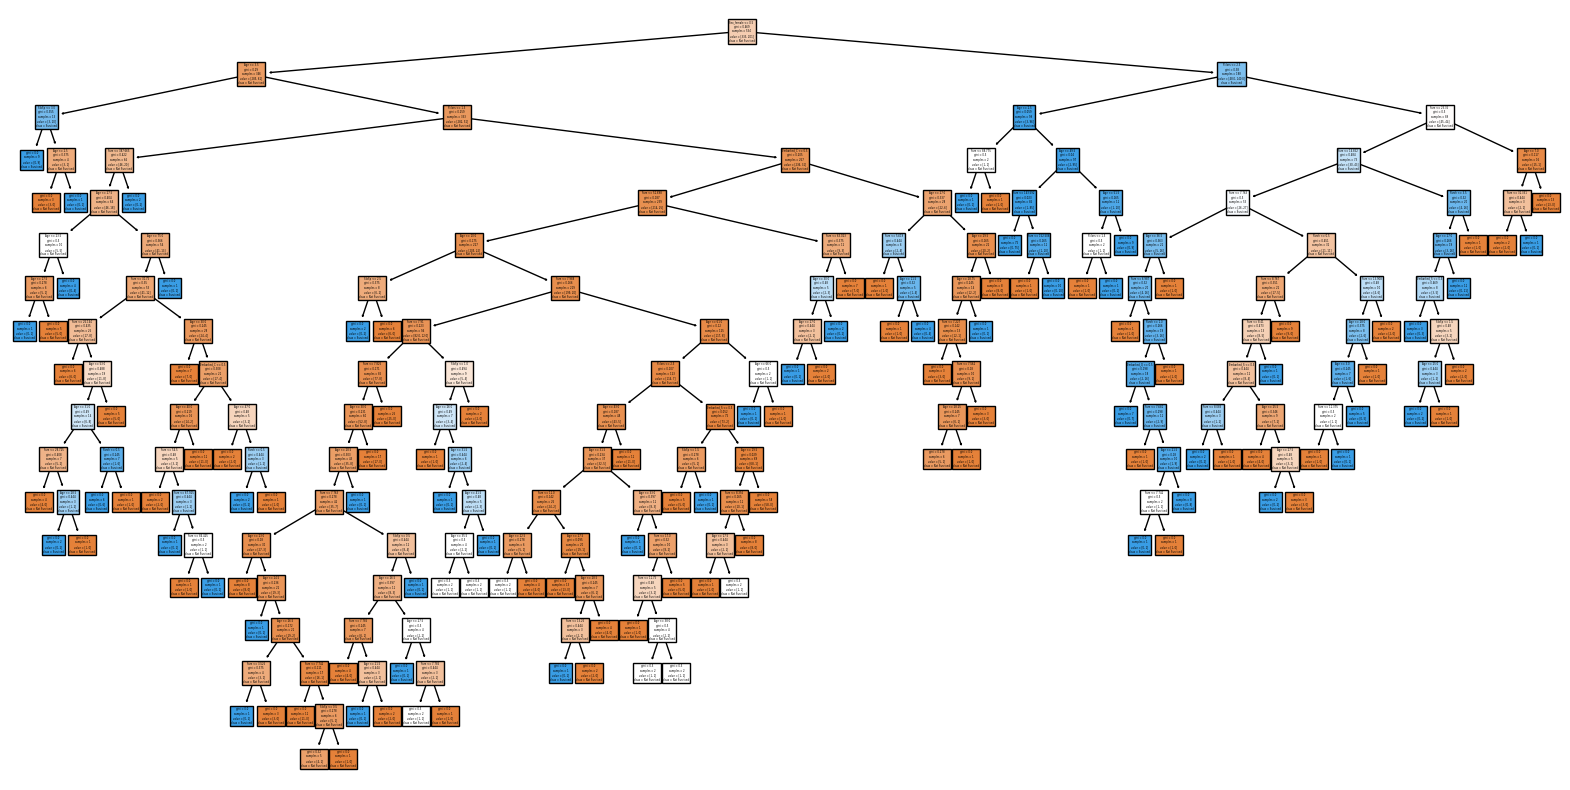

Training Accuracy: 0.98
Development Accuracy: 0.69


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Initial model with no max_depth restriction
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, 
               class_names=["Not Survived", "Survived"])
plt.show()

# Evaluate the model on the training and development sets
train_accuracy = clf.score(X_train, y_train)
dev_accuracy = clf.score(X_dev, y_dev)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Development Accuracy: {dev_accuracy:.2f}")

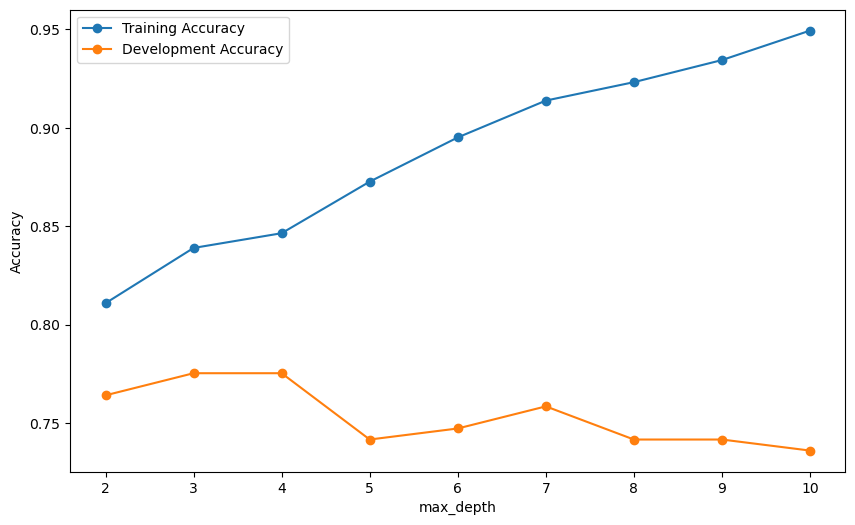

In [24]:
# Tuning the max_depth parameter to avoid overfitting
train_accuracies = []
dev_accuracies = []
depths = list(range(2, 11))

# Iterate over a range of max_depth values and record accuracies
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    train_accuracies.append(clf.score(X_train, y_train))
    dev_accuracies.append(clf.score(X_dev, y_dev))

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, dev_accuracies, label='Development Accuracy', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Describing Shapes of Accuracy Lines**

Training Accuracy Line:
The accuracy on the training set generally increases as the "max_depth"
increases. This is due to a deeoer tree that fits the training data, more precisiely. It captures more details patterns and noise.

Develeopment Accuracy Line:
Initially the accuracy of the development set also increases as "max_depth" but after a certain point it starts to decrease. This happens as the model overfits the training data, capturing more patterns and noise.

This pattern reflects the bias-variance tradeoff: increasing max_depth reduces bias (fitting the training data better) but increases variance (overfitting to noise).


In [25]:
# Choose the best max_depth based on development accuracy
best_depth = 4

# Train the final model using the best max_depth
clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the final model on the test set
test_accuracy = clf.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.82


**Final Model Test Data Accuracy Report**

Test Accuracy: 
The final model's accuracy on the test set is the true measure of how well the model generalizes to completely unseen data. This value should be reported as a reflection of the model's performance.

A test accuracy of 0.82 (or 82%) indicating good generalization to completely unseen data, confirms that the model is not overfitting and is performing consistently across different datasets



**Bagging, Random Forest, and Boosted Trees Implementation**

In [26]:
# Import libraries
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Train a Bagged Decision Tree model
# Base estimator is a decision tree

# Train a Bagged Decision Tree model
bagging_clf = BaggingClassifier(
    # Base estimator is a decision tree
    estimator=DecisionTreeClassifier(random_state=42),  
    n_estimators=100,  # Number of trees in the ensemble
    random_state=42  # Ensure reproducibility
)
# Fit the model on the training data
bagging_clf.fit(X_train, y_train)  
# Evaluate the model on the test set
bagging_accuracy = bagging_clf.score(X_test, y_test)  

# Train a Random Forest model
rf_clf = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    random_state=42  # Ensure reproducibility
)
# Fit the model on the training data
rf_clf.fit(X_train, y_train)  
# Evaluate the model on the test set
rf_accuracy = rf_clf.score(X_test, y_test)  

# Analyze feature importance from the Random Forest model
importances = rf_clf.feature_importances_  # Extract feature importances
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,  # Feature names
    "Importance": importances  # Corresponding importances
})
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)
print("Feature importances:")
print(feature_importance_df)  # Display the sorted feature importances

# Train a Gradient Boosted Trees model
boost_clf = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages
    max_depth=3,  # Maximum depth of the individual estimators
    random_state=42  # Ensure reproducibility
)
# Fit the model on the training data
boost_clf.fit(X_train, y_train)  

# Evaluate the model on the test set
boost_accuracy = boost_clf.score(X_test, y_test)  

# Report the accuracies of all models
print(f"Bagged Decision Tree Test Accuracy: {bagging_accuracy:.2f}")
print(f"Random Forest Test Accuracy: {rf_accuracy:.2f}")
print(f"Boosted Trees Test Accuracy: {boost_accuracy:.2f}")

Feature importances:
      Feature  Importance
4        Fare    0.244928
1         Age    0.234451
6    Sex_male    0.172494
5  Sex_female    0.133988
0      Pclass    0.086075
2       SibSp    0.046770
3       Parch    0.039545
7  Embarked_C    0.016151
9  Embarked_S    0.016068
8  Embarked_Q    0.009530
Bagged Decision Tree Test Accuracy: 0.78
Random Forest Test Accuracy: 0.81
Boosted Trees Test Accuracy: 0.82


**Parameter Tuning**

In [27]:
# Hyperparameter tuning for Random Forest 
param_grid = {
    # Range of values for the number of trees
    'n_estimators': [50, 100, 200],
    # Range of values for the maximum depth of the trees
    'max_depth': [None, 5, 10, 15]   
}

# Perform grid search with cross-validation to find the 
# best hyperparameters
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),  # Model to tune
    param_grid,  # Dictionary of hyperparameters to search over
    cv=5,  # Use 5-fold cross-validation
    scoring='accuracy'  # Optimize for accuracy
)
# Fit the grid search on the training data
grid_search.fit(X_train, y_train)  

# Display the best parameters and the corresponding 
# cross-validation accuracy
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

# Evaluate the best model on the test set
# Extract the best model from grid search
best_rf = grid_search.best_estimator_  
# Evaluate the best model on the test data
test_accuracy = best_rf.score(X_test, y_test)  
print(f"Test Accuracy of Best Random Forest: {test_accuracy:.2f}")

Best parameters: {'max_depth': 5, 'n_estimators': 50}
Best cross-validation accuracy: 0.84
Test Accuracy of Best Random Forest: 0.82


**Report**

**Bagged Decision Tree Model**
Model Type: Bagging Classifier with Decision Trees as the base estimator.
Number of Trees (n_estimators): 100
Test Accuracy: 0.78

**Random Forest Model**
Model Type: Random Forest
Number of Trees (n_estimators): 100
Test Accuracy: 0.81

**Gradient Boosting Model**
Model Type: Gradient Boosting Classifier
Number of Trees (n_estimators): 100
Maximum Depth (max_depth): 3
Test Accuracy: 0.82

Hyperparameter Tuning for Random Forest
The Random Forest model was further tuned using grid search to optimize the hyperparameters, leading to the following results:

Best Parameters: max_depth = 5, n_estimators = 50
Best Cross-Validation Accuracy: 0.84
Test Accuracy of Best Random Forest: 0.82
Bagged Decision Tree Test Accuracy: 0.78
Random Forest Test Accuracy: 0.81
Boosted Trees Test Accuracy: 0.82

Among the models tested, the Gradient Boosting model achieved the highest test accuracy of 0.82, closely followed by the tuned Random Forest model, which also achieved a test accuracy of 0.82 after hyperparameter tuning. The feature importance analysis identified Fare, Age, and Sex as the most significant predictors of survival.